# 统计学习（Statistical Learning)

## 统计学习是什么？

> 参考文献：[「统计学」「统计推断」「统计学习」有什么区别？](https://www.zhihu.com/question/23687389)

**名词：**

- 概率论：大千视界中，数据分布呈现出来的形状（分布函数、密度函数...）。
- 数理统计：建立在各种分布的前提下，我们如何用少量的样本数据来推断总体的一些性质；或者推断两个样本是否来自一个总体；等等...
- 统计推断：根据样本数据对总体进行统计推断。包括：「参数估计问题」、「假设检验问题」两个方向。
- 统计学：概率论 + 数理统计 = 统计学
- 「统计学习」：在 machine learning 学科下，利用统计学知识和数值型数据来进行机器学习（也称之为：优化）。

**几者之间的关系：**

- 「概率论」是「数理统计」的理论基础
- 学「数理统计」等于在学习如何进行「统计推断」
- 「概率论」+「数理统计」=「统计学」
- 「统计推理」是学习「统计学」的目的，「统计学」是「统计推理」的基础
- 「回归模型」是「统计学」中最常用的模型
- 「回归模型」参数求解的主要方法包括：「最小二乘（OLS）」和「最大似然估计（MLE）」
- OLS 和 MLE 的求解实质上是一个「数值优化（optimization）」问题
- 机器学习的一个方向就是：让机器求解一个或多个「数值优化」问题，这种思路称之为「统计学习」
- 机器学习的另一个方向是：通过逻辑判断的方法来求解问题，称之为「内容学习（Concept Learning）」
- 「统计学习」关注的是：最小化预测误差

**统计学习方法特点：**

| 方法           | 适用问题         | 模型特点                                           | 模型类型 | 学习策略                           | 损失函数             | 学习算法                               |
| -------------- | ---------------- | -------------------------------------------------- | -------- | ---------------------------------- | -------------------- | -------------------------------------- |
| 感知机         | 二分类           | 分离超平面                                         | 判别     | 极小化误分点到超平面的距离         | 误分点到超平面的距离 | 随机梯度下降                           |
| K 近邻         | 多分类、回归     | 特征空间、样本点                                   | 判别     | —                                  | —                    | —                                      |
| 朴素贝叶斯     | 多分类           | 特征与类别的联合概率分布，条件独立假设             | 生成     | 极大似然估计，极大后验概率估计     | 对数似然损失         | 概率计算公式，EM 算法                  |
| 决策树         | 多分类、回归     | 分类树，回归树                                     | 判别     | 正则化的极大似然估计               | 对数似然损失         | 特征选择，生成，剪枝                   |
| 逻辑斯蒂回归   | 多分类           | 特征条件下类别的条件概率分布，对数线性模型         | 判别     | 极大似然估计，正则化的极大似然估计 | 逻辑斯蒂损失         | 改进的迭代尺度算法，梯度下降，拟牛顿法 |
| 支持向量机     | 二分类           | 分离超平面，核技巧                                 | 判别     | 极小化正则合页损失，软间隔最大化   | 合页损失             | 序列最小最优化算法（SMO）              |
| 集成方法       | 二分类           | 弱分类器的线性组合                                 | 判别     | 极小化加法模型的指数损失           | 指数损失             | 前向分布加法算法                       |
| EM 算法        | 概率模型参数估计 | 含隐变量概率模型                                   | —        | 极大似然估计，极大后验概率估计     | 对数似然损失         | 迭代算法                               |
| 隐马尔可夫模型 | 标注             | 观测序列与状态序列的联合概率分布模型               | 生成     | 极大似然估计，极大后验概率估计     | 对数似然损失         | 概率计算公式，EM 算法                  |
| 条件随机场     | 标注             | 状态序列条件下观测序列的条件概率分布，对数线性模型 | 判别     | 极大似然估计，正则化极大似然估计   | 对数似然损失         | 改进的迭代尺度算法，梯度下降，拟牛顿法 |


## 数据集与估计器

### 数据集

scikit-learn 的数据集是一个 2d 数组，它们被理解为多维观测（multi-dimensional observations）的列表（list）。我们称数组的第一个轴为样本轴，第二个轴为特征轴。

如果原始数据不是 `(n_samples, n_features)` 格式的，那么在交给 scikit-learn 进行学习前，需要重新格式化数据。

例如：digits dataset。原始数据是：`(1792, 8, 8)` 格式的，需要通过 `reshape()` 转换为 `(1797, 64)` 格式的数据。

> 原始的 digits dataset 的格式为：
> - 训练集：`(60000, 28, 28)`
> - 测试集：`(10000, 28, 28)`
>
> 在 scikit-learn 中，对该数据集进行了裁剪。

In [4]:
from sklearn.datasets import load_digits

digits = load_digits()
print("digits.images.shape:", digits.images.shape)

data = digits.images.reshape(digits.images.shape[0], -1)
print("data.shape:", data.shape)

digits.images.shape: (1797, 8, 8)
data.shape: (1797, 64)


> 实际上，scikit-learn 的内置数据集已经格式化好了数据。上例中，`digits.data` 就已经是格式化好的数据，`digits.images` 是原始数据。上面的代码片段，仅仅是为了演示如何格式化数据。

### 估计器

**拟合（Fitting data）**：估计器（`estimator`）从数据中进行学习，完成*分类*、*回归*、*聚类*、和*转换*。所有的估计器都实现了一个 `fit()` 方法，来完成模型的训练。

**转换（Transform）**：从原始数据中*提取*、*筛选*有用的特征。

**估计器参数（Estimator parameters）**：所有的参数可以在初始化的时候设定，也可以在后面进行修改。

**估计参数（Estimated parameters）**：训练完成后得到的模型参数，也可以通过估计器的属性来获得，这些属性以“*下划线*”结尾。例如：`estimator.estimated_param_`

## 监督学习：从高维观测（high-dimensional observations）进行预测

- 监督学习（Supervised learning）
- 观测数据（Observations)
- 目标/标签（Target/Label）

### 近邻算法（Nearest Neighbor）和维度灾难（curse of dimensonality）

从直观感觉上，随着特征维度的增加，分类器会越来越准；但事实上随着特征维度的增加，分类器会越来越不准，同时带来很多其它问题，包括：

- 维度的增加，会导致模型的“*泛化*”能力下降。泛化能力下降，被称为“*过拟合*”。
- 理论上，可以通过增加样本数来改善模型的泛化能力；但是，随着维度的增加，所需的样本数成指数增加。当维度增加到 20d 时，理论上 KNN 算法所需的样本数超过了互联网的总数据量。
- 维度的增加，会导致估计器的参数量急剧增加。

可以通过“*降维*”来解决维度灾难，常见的降维方法包括：

- 特征选择
- 特征提取
- 交叉验证

> 参考文献：[机器学习中的维度灾难](https://zhuanlan.zhihu.com/p/26945814)

### 线性模型：从回归到稀疏（Sparsity）

#### 线性回归模型

$y=X\beta+\epsilon$

- $X$：data
- $y$：target
- $\beta$：系数
- $\epsilon$：观测噪声（Observation noise）

#### 特征缩减（Shrinkage）

**名词**：

- **偏差（bias）**
- **方差（variance）**：在机器学习领域，同一模型在不同数据集间拟合效果的差异称为***方差***。

**方差计算公式**：$var(x)=E_D[(f(x;D)-y)^2]$

- $x$：测试集
- $y$：期望预测
- $D$：不同的训练集
- $f(x;D)$：不同训练集拟合模型的预测值
- $E_D$：不同训练集的平均值

**偏差与方差**：

- 在机器学习中，理想的算法是具有较小的偏差，能够准确的描述数据间的关系；同时又具有较小的方差，能够在不同的数据集间表现出一致性的预测性能。
- 但是在实践中，两者往往不可得兼：
    - 简单的模型，往往有较大的偏差，我们称之为“*欠拟合*”；但是方差比较小，我们称之为“*泛化*”能力强。
    - 复杂的模型，往往偏差小；但是方差比较大，我们称之为“*过拟合*”。
    - 我们的目标是要找到一个折中的解决方案，既不能“*欠拟合*”，也不能“*过拟合*”。

> 参考文献：
>
> 1. [机器学习中，偏差和方差具体如何计算呢？](https://www.zhihu.com/question/291599944)
> 2. [偏差与方差（Bias and Variance）](https://mp.weixin.qq.com/s?__biz=Mzg4NjA5Mzg2Mw==&mid=2247496617&idx=2&sn=62b3911c88428737f228430f46e50eef&chksm=cf9c52e1f8ebdbf7549f08564364699bab34d02b0ec2fdf0031c39ae8dd293df79d0520660f2&scene=21#wechat_redirect)

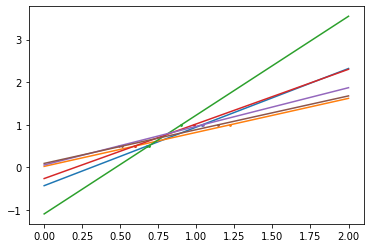

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# feature
X = [[0.5], [1.]]
# target
y = [.5, 1.]
# test_set
X_test = [[0.], [2.]]
# 生成了一个简单的线性回归问题，回归方程为：y = x
# 同时生成了一个测试集，期望的预测值应为：y_test = [0., 2.]

regr = LinearRegression()

plt.figure()

np.random.seed(0)
for _ in range(6):
  # 在 X 上添加随机噪声，生成 X_train
  X_train = .1 * np.random.normal(size=(2, 1)) + X

  regr.fit(X_train, y)

  # 绘制训练集的散点图
  plt.scatter(X_train, y, s=3)
  # 绘制测试集的曲线
  plt.plot(X_test, regr.predict(X_test))

上面的例子可以看出：当观察数据过少时，观察样本的噪声会严重影响到拟合的方差。导致拟合结果在测试集上表现不佳。

解决问题的方案，是使用“*岭回归（Ridge）*”。

> 参考文献：[通俗易懂的岭回归](https://cloud.tencent.com/developer/article/1699240)

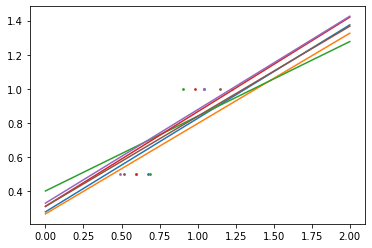

In [9]:
from sklearn.linear_model import Ridge

regr = Ridge(alpha=0.1)

plt.figure()

np.random.seed(0)

for _ in range(6):
  # 在 X 上添加随机噪声，生成 X_train
  X_train = .1 * np.random.normal(size=(2, 1)) + X

  regr.fit(X_train, y)

  # 绘制训练集的散点图
  plt.scatter(X_train, y, s=3)
  # 绘制测试集的曲线
  plt.plot(X_test, regr.predict(X_test))

这是偏差/方差权衡的一个示例：岭回归的 `alpha` 参数越大，偏差越高，方差越低。

#### 稀疏（sparsity）

